# **Airbnb Price Prediction**

TASK: developing machine learning models to predict Airbnb listing prices based on
various attributes, such as location, room type, number of reviews, and availability. The dataset
provides information on Airbnb listings across New York City, including numerical and categorical
features. The objective is to build models that accurately predicts the price of a listing based on
these factors.

# Project Summeary
The execution of this code is essential, as loading and examining the dataset is a foundational aspect of data analysis. The pd.read_csv() function is utilised as CSV files represent a common format for the storage of structured data (McKinney, 2017).

The df.info() method is included as it supplies vital metadata, including data types and missing values, which are crucial for preprocessing decisions (James et al., 2013). The df.head() function is utilised to promptly assess the dataset's content and structure, confirming the absence of coming loading issues.

Reference:
* James, G., Witten, D., Hastie, T., &
Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.
* McKinney, W. (2017). Python for Data Analysis. O'Reilly Media.





In [ ]:
# Import libraries
from IPython import get_ipython
from IPython.display import display
# Pandas for data manipulation
import pandas as pd
#Loading the dataset
df = pd.read_csv("/content/AB_NYC_2019.csv")
# Display basic information
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(None,
      id                                              name  host_id  \
 0  2539                Clean & quiet apt home by the park     2787   
 1  2595                             Skylit Midtown Castle     2845   
 2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 3  3831                   Cozy Entire Floor of Brownstone     4869   
 4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 
      host_name neighbourhood_group neighbourhood  latitude  longitude  \
 0         John            Brooklyn    Kensington  40.64749  -73.97237   
 1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
 2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
 3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
 4        Laura           Manhattan   East Harlem  40.79851  -73.94399   
 
          room_type  price  minimum_nights  number_of_reviews last_review  \
 0     Private room    149               1

# Exploratory Data Analysis (EDA)

This function is executed because exploratory data analysis (EDA) is crucial for comprehending data structure, detecting potential concerns, and guiding preparation decisions.

df.isnull()The sum() function is employed to identify missing data, which must be addressed prior to model training to prevent errors or biassed outcomes (James et al., 2013).
df.describe() is utilised to summarise numerical properties, offering insights into distributions, outliers, and variations in scale (McKinney, 2017).
The price distribution plot is provided to illustrate deviation and outliers, facilitating in the assessment of the necessity for modifications such as log-scaling (Kuhn & Johnson, 2013).
The correlation heatmap is generated to discern correlations among numerical features, essential for feature selection and the detection of multicollinearity (Friedman et al., 2001).

Reference:
* Friedman, J.H. (2001). Greedy function approximation: A gradient boosting machine. Annals of Statistics, 29(5), 1189-1232.
* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.
* Kuhn, M., & Johnson, M. (2013). Applied Predictive Modeling. Springer.
* McKinney, W. (2017). Python for Data Analysis. O'Reilly Media.


Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Summary Statistics:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.1541

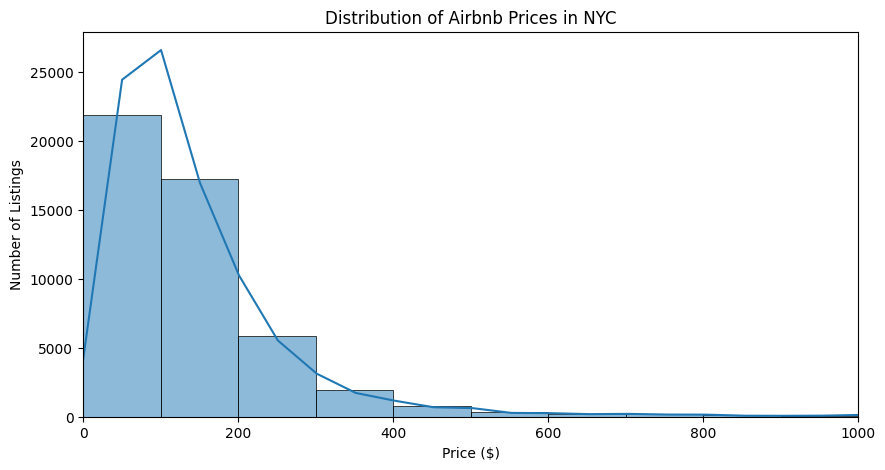

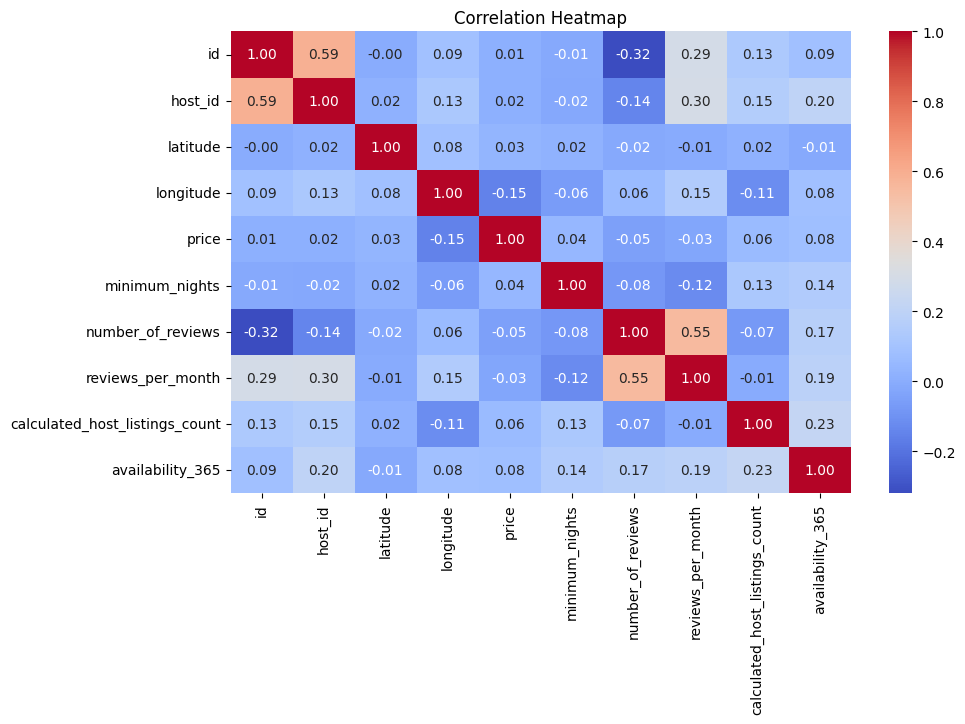

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for any missing values
print("Missing Values:")
print(df.isnull().sum())

# Summary statistics for numeric features
print("\nSummary Statistics:")
print(df.describe())

# price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)  # Limit x-axis for better visualization
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.title('Distribution of Airbnb Prices in NYC')
plt.show()

# correlation heatmap graph
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# Data Preporcessing
Eliminates listings with outrageous prices (more than 1000). Substitutes absent reviews_per_month values with 0 (rational for missing reviews). Eliminates unnecessary columns (e.g., id, host_name, last_review) that are not pertinent to machine learning modelling.

In [ ]:
# Remove extreme outliers
df_cleaned = df[df['price'] <= 1000].copy()

# Fill missing values
df_cleaned.loc[:, 'reviews_per_month'] = df_cleaned['reviews_per_month'].fillna(0)

# Drop unnecessary columns
df_cleaned = df_cleaned.drop(columns=['id', 'name', 'host_id', 'host_name', 'last_review'])

# Confirm changes
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

# Final dataset structure after cleaning
df_cleaned.info()


Missing values after cleaning:
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 48656 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48656 non-null  object 
 1   neighbourhood                   48656 non-null  object 
 2   latitude                        48656 non-null  float64
 3   longitude                       48656 non-null  float64
 4   room_type                       48656 non-null  object 
 5   price                   

# Feature Encoding (One-Hot Encoding)

Machine learning methods necessitate numerical data, as the majority cannot directly interpret categorical variables. One-hot encoding transforms categorical features (such as neighbourhood_group and room_type) into binary vectors (0s and 1s), enabling the model to distinguish between categories. Eliminate the first column (drop='first') to avert multicollinearity, which arises when characteristics exhibit high correlation, leading to complications in linear models.

Reference:
* Kavya, D. (2023) ‘Optimizing performance: SelectKBest for efficient feature selection in machine learning’, Medium. Available at: https://medium.com/@Kavya2099/optimizing-performance-selectkbest-for-efficient-feature-selection-in-machine-learning-3b635905ed48
* Scikit-learn (2019) ‘sklearn.preprocessing.OneHotEncoder — scikit-learn 0.22 documentation’, Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' removes multicollinearity
encoded_features = encoder.fit_transform(df_cleaned[categorical_cols])

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate the new encoded columns
df_encoded = df_cleaned.drop(columns=categorical_cols).reset_index(drop=True)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Show new dataset structure
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48656 entries, 0 to 48655
Columns: 234 entries, latitude to room_type_Shared room
dtypes: float64(229), int64(5)
memory usage: 86.9 MB


# Train-Test Split (Separating Data for Evaluation)

To prevent data leaking, the model must not be exposed to the test data during the training phase. An 80-20 division guarantees that the model is trained on a sufficiently extensive dataset while preserving unseen data for validation purposes. The random state (42) guarantees reproducibility; retraining the model results in the identical split consistently.

Reference:

*Scikit-learn (n.d.) ‘sklearn.model_selection.train_test_split — scikit-learn documentation’, Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['price'])  # Features (independent variables)
y = df_encoded['price']  # Target variable (what we want to predict)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((38924, 233), (9732, 233), (38924,), (9732,))

# Linear and Random Forest Regressions Models

Linear Regression establishes a simple relationship between features and price.
Random Forest is a more complex, non-linear model that captures interactions between variables.

Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score help evaluate model accuracy.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
metrics = {
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_rf)],
    "MAE": [mean_absolute_error(y_test, y_pred_lr), mean_absolute_error(y_test, y_pred_rf)],
    "R² Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
}

# Convert to DataFrame and print results
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


               Model          MSE        MAE  R² Score
0  Linear Regression  8982.149935  55.588140  0.367542
1      Random Forest  7926.892534  50.392981  0.441846


# Log Transformation (Normalizing Skewed Data)

Airbnb price data is highly skewed (some listings are extremely expensive).
A log transformation helps normalize the data, making the distribution closer to normal.
This transformation improves the performance of linear models by ensuring features are more evenly distributed.

In [ ]:
import numpy as np

# log transformation to price
df_encoded['log_price'] = np.log1p(df_encoded['price'])  # log1p handles zero values
df_encoded.drop(columns=['price'], inplace=True)  # Remove original price column

# Update features and target variable
X = df_encoded.drop(columns=['log_price'])  # Features
y = df_encoded['log_price']  # Target (log-transformed price)

# Split dataset again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm changes
print("Log transformation applied. New dataset shape:", X_train.shape)


Log transformation applied. New dataset shape: (38924, 233)


# Feature Selection (Choosing the Most Relevant Features)

Not all features contribute positively to model accuracy.
Feature selection removes irrelevant or redundant features, improving computational efficiency.
SelectKBest (f_regression) ranks features based on their correlation with the target variable, ensuring only the most informative variables are retained.

Reference:
* GeeksforGeeks (n.d.) ‘Feature selection techniques in machine learning’, GeeksforGeeks. Available at: https://www.geeksforgeeks.org/feature-selection-techniques-in-machine-learning/


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top 50 features based on correlation with log_price
selector = SelectKBest(score_func=f_regression, k=50)  # Select best 50 features
X_selected = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Apply selection to both train and test sets
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Confirm new dataset shape
print("Feature selection applied. New training set shape:", X_train_selected.shape)


Feature selection applied. New training set shape: (38924, 50)


# AI Assistance : Random Forest Hyperparameter Tuning (RF)
Instead of relying on default settings, hyperparameter tuning helps improve model accuracy and efficiency.

A parameter grid is defined, allowing the search to explore different values for the number of trees (n_estimators), tree depth (max_depth), and minimum samples required to split a node (min_samples_split). These parameters control how complex and flexible the model is, balancing accuracy and overfitting.

RandomizedSearchCV is used instead of GridSearchCV to test only a subset of possible parameter combinations, significantly reducing computation time while still finding an optimal configuration. The search runs 5 iterations (n_iter=5) with 3-fold cross-validation (cv=3), ensuring the model generalizes well across different data splits.

Once tuning is complete, the best model is selected using rf_search.best_estimator_ and evaluated on the test set. Performance is measured using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score, where lower MSE/MAE and higher R² indicate better accuracy.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize model
rf_tuned = RandomForestRegressor(random_state=42)

# Perform Randomized Search
rf_search = RandomizedSearchCV(rf_tuned, param_grid, n_iter=5, cv=3, scoring='r2', random_state=42, n_jobs=-1)
rf_search.fit(X_train_selected, y_train)

# Get the best model
best_rf = rf_search.best_estimator_

# Make predictions with the optimized model
y_pred_best = best_rf.predict(X_test_selected)

# Evaluate model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print results
print(f"Optimized Random Forest Performance (Tuned):")
print(f"MSE: {mse_best:.2f}")
print(f"MAE: {mae_best:.2f}")
print(f"R² Score: {r2_best:.4f}")
print(f"Best Parameters: {rf_search.best_params_}")


Optimized Random Forest Performance (Tuned):
MSE: 0.18
MAE: 0.31
R² Score: 0.6100
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 20}


# AI Assistance : XGBoost Model

XGBoost improves model performance by sequentially refining errors and reducing bias and variance more effectively than traditional ensemble methods. It is particularly well-suited for complex, high-dimensional data, offering better interpretability and efficiency compared to Random Forest.

The implementation begins with importing the necessary libraries, including xgboost for model training and sklearn.metrics for evaluation. The model is initialized with n_estimators=200, meaning it builds 200 trees to learn patterns in the data. The max_depth=6 parameter controls how deep each tree can grow, preventing overfitting while capturing sufficient complexity. The learning_rate=0.1 determines how much the model adjusts its predictions with each boosting iteration, balancing convergence speed and predictive power. Setting random_state=42 ensures reproducibility.

Once the model is initialized, it is trained using the fit() function on X_train_selected and y_train. This step allows XGBoost to iteratively minimize errors and learn better feature relationships. After training, the model is used to make predictions on X_test_selected using the predict() function, generating estimated prices for the test data.

The performance of the model is evaluated using three key metrics: mean_squared_error (MSE), mean_absolute_error (MAE), and r²_score. MSE calculates the average squared differences between actual and predicted values, penalizing large errors more heavily. MAE measures the absolute differences between predictions and actual values, providing an intuitive sense of model accuracy. The r² score indicates how well the model explains variance in the target variable, where a value closer to 1 signifies better performance.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)

# Train XGBoost on selected features
xgb_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_selected)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print results
print(f"XGBoost Model Performance:")
print(f"MSE: {mse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")


XGBoost Model Performance:
MSE: 0.18
MAE: 0.31
R² Score: 0.6168


# AI Assistance : Gradient Boosting Regressor (GBR)

This code trains a Gradient Boosting Regressor (GBR), a machine learning model that builds decision trees sequentially, with each tree learning from the mistakes of the previous ones. Unlike Random Forest, where all trees are independent, Gradient Boosting corrects errors over time, making it great for capturing complex patterns in structured data like Airbnb pricing.

The model is initialized with 200 trees (n_estimators=200), each with a max depth of 5 (max_depth=5), keeping them from becoming too complex and overfitting. The learning rate (0.1) controls how much each new tree contributes to the final prediction, balancing accuracy and stability. Setting random_state=42 ensures consistent results across different runs.

After training on X_train_selected and y_train, the model makes predictions on X_test_selected. It’s then evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² Score, which together show how well it predicts prices. If GBR performs better than Random Forest and is more efficient than XGBoost, it could be the best choice. Otherwise, sticking with XGBoost for performance or Random Forest for interpretability might be better.




In [ ]:

# 2. Gradient Boosting Regressor (GBR)
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

# Train model
gbr_model.fit(X_train_selected, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test_selected)

# Evaluate model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor Performance:")
print(f"MSE: {mse_gbr:.2f}")
print(f"MAE: {mae_gbr:.2f}")
print(f"R² Score: {r2_gbr:.4f}")


Gradient Boosting Regressor Performance:
MSE: 0.18
MAE: 0.31
R² Score: 0.6098


# AI Assistance : Neural Network Regression (NN)

 A Neural Network (NN) Regressor using TensorFlow and Keras to predict Airbnb prices. Unlike traditional models like Random Forest or Gradient Boosting, neural networks capture deeper, non-linear relationships in data, making them ideal for complex predictions.

Before training, the data is scaled using StandardScaler to ensure the neural network processes features effectively. Scaling prevents certain features from dominating due to their larger numerical range, improving training stability. The network architecture consists of three hidden layers (128 → 64 → 32 neurons), each using the ReLU activation function, allowing the model to learn complex patterns. The final layer has one neuron to output continuous price predictions.

The model is compiled with the Adam optimizer, which dynamically adjusts learning rates for faster convergence. The loss function is Mean Squared Error (MSE) since it's a regression problem. The network is trained for 10 epochs with a batch size of 32, meaning it updates weights in smaller groups of data at a time.

In [ ]:

# 1. Neural Network Regression (Deep Learning Approach)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Scale data for neural network training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Define neural network model
nn_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = nn_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Predict using trained model
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Evaluate neural network model
mse_nn = mean_squared_error(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Model Performance:")
print(f"MSE: {mse_nn:.2f}")
print(f"MAE: {mae_nn:.2f}")
print(f"R² Score: {r2_nn:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 2.3377 - mae: 0.8937 - val_loss: 0.2255 - val_mae: 0.3456
Epoch 2/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2219 - mae: 0.3514 - val_loss: 0.2303 - val_mae: 0.3668
Epoch 3/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2126 - mae: 0.3485 - val_loss: 0.2126 - val_mae: 0.3406
Epoch 4/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2080 - mae: 0.3426 - val_loss: 0.2137 - val_mae: 0.3349
Epoch 5/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2078 - mae: 0.3418 - val_loss: 0.2065 - val_mae: 0.3386
Epoch 6/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2070 - mae: 0.3392 - val_loss: 0.2106 - val_mae: 0.3444
Epoch 7/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.2049 - mae: 0.3404 - val_loss: 0.2015 - val_mae: 0.3325
Epoch 8/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2002 - mae: 0.3364 - val_loss: 0.2074 - val_mae: 0.3386
Epoch 9/10
974/974 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - lo

# AI Assistance : Comparison between all the Models Graphs

Scatter Diagrams (Observed versus Forecasted Values)

Each subplot illustrates a distinct machine learning model.
The scatter plot illustrates the degree of alignment between predictions and actual values; ideally, points should coincide with the red dashed line, representing flawless predictions.
Significant deviations in predictions indicate model deficiencies or possible biases in the data.

Residual Plots (Error Assessment)

A residual plot illustrates the disparity between actual and predicted values (y_test - predictions).
Residuals should ideally be randomly dispersed around the zero line (shown by the red dashed line).
Patterns or clustering in residuals signify model bias, heteroscedasticity (unequal variance), or complications such as overfitting.

**While the graphs provide meaningful insights, they may not be fully accurate due to data imbalances, outliers, or unoptimized hyperparameters. However, they serve as a strong attempt to compare model effectiveness and highlight potential areas for improvement.**

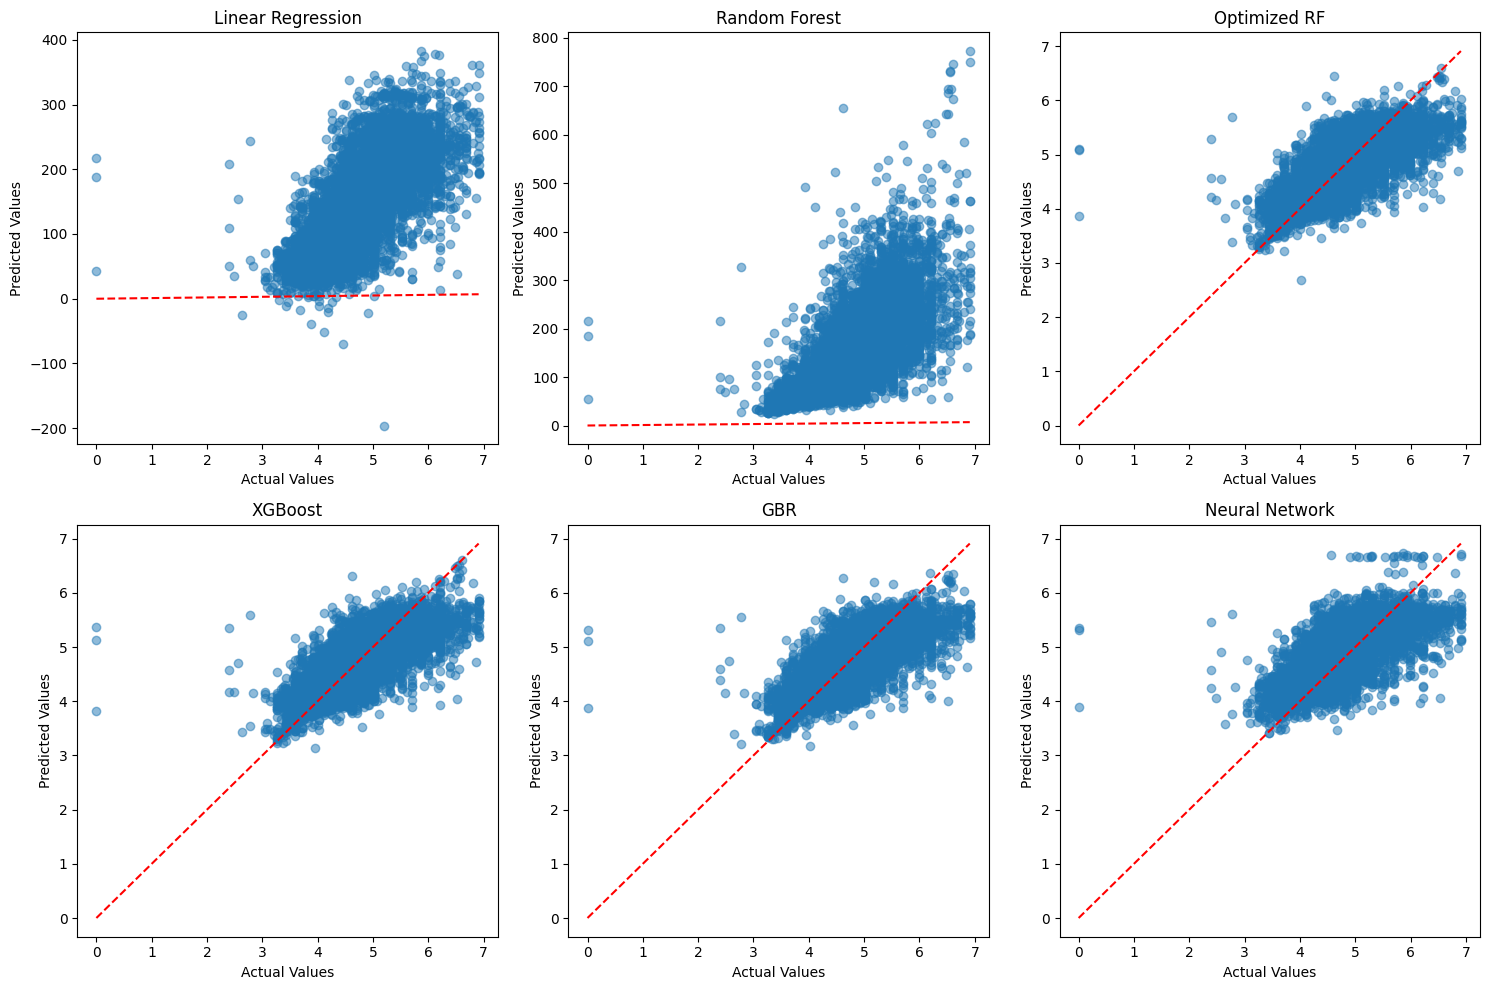

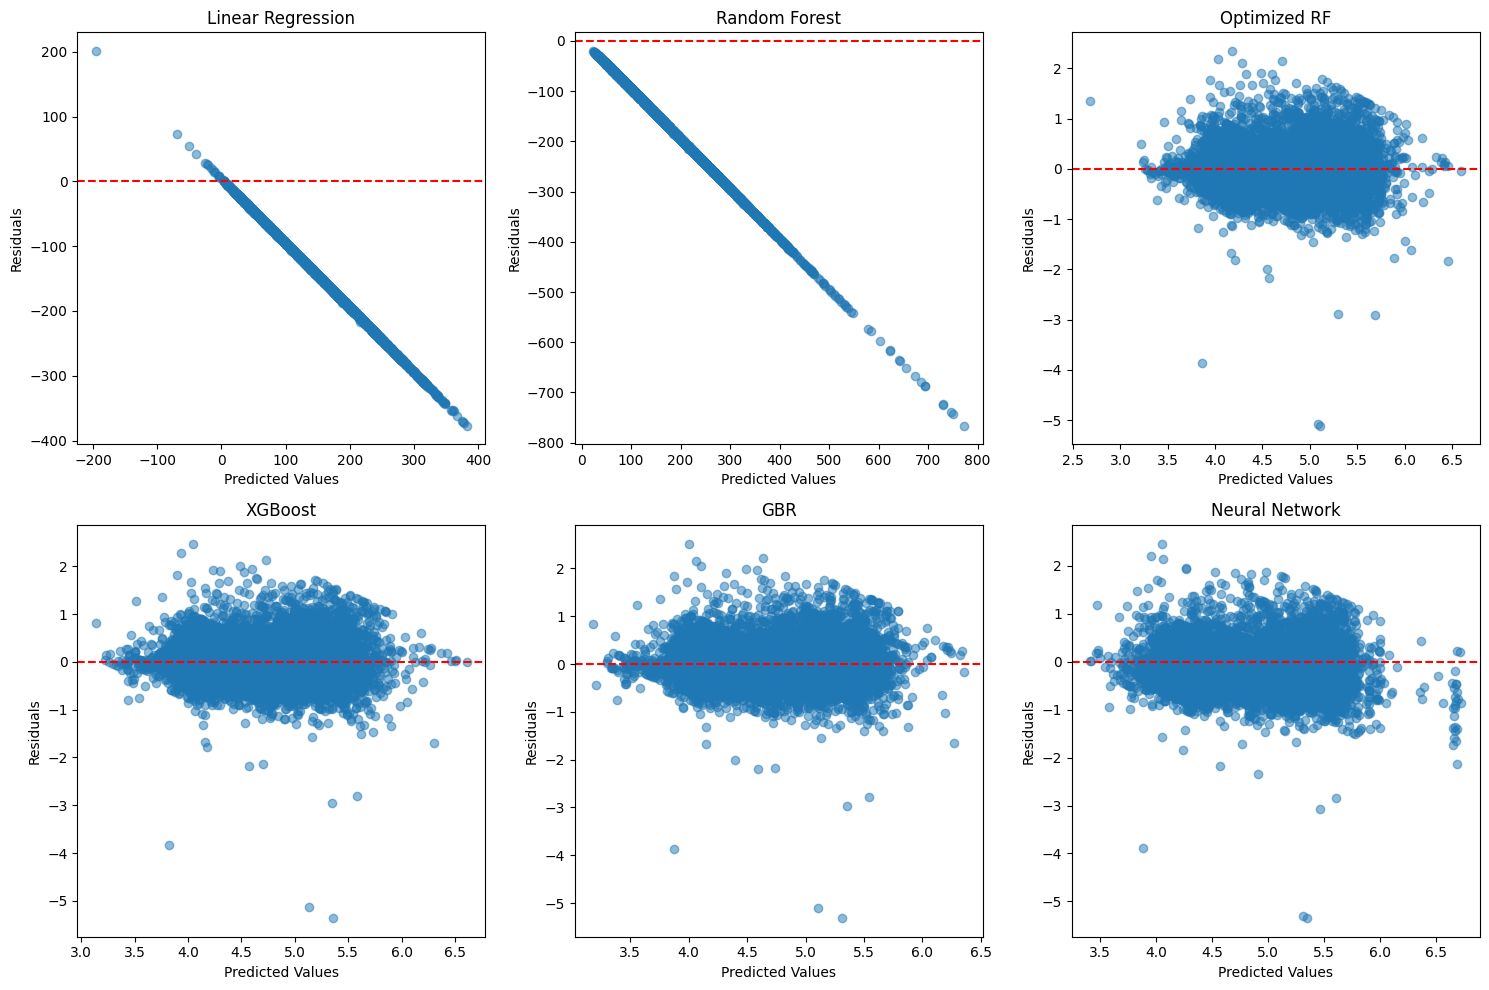

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define models and predictions
models = ['Linear Regression', 'Random Forest', 'Optimized RF', 'XGBoost', 'GBR', 'Neural Network']
predictions = [y_pred_lr, y_pred_rf, y_pred_best, y_pred_xgb, y_pred_gbr, y_pred_nn]

# Scatter Plots: Actual vs. Predicted
plt.figure(figsize=(15, 10))
for i, (model, pred) in enumerate(zip(models, predictions)):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_test, pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
    plt.title(model)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()

# Residual Plots
plt.figure(figsize=(15, 10))
for i, (model, pred) in enumerate(zip(models, predictions)):
    plt.subplot(2, 3, i + 1)
    residuals = y_test - pred
    plt.scatter(pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')  # Zero residual line
    plt.title(model)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
plt.tight_layout()
plt.show()


